# Table of contents
1. [Cleanup](#cleanup)
    1. [First look at columns](#fst_look)
    2. [Country cleanup](#country_cleanup)
2. [EDA](#EDA)
    1. [Country analysis](#country__analysis)
        1. [Top-20 countries by show production?](#q__top20_countries)
        2. [What type quantity of shows do top-3 countries produce?](#q__type_quantity)
    2. [Show type analysis](#type__analysis)
        1. [Of what type are there more shows?](#q__more_type)
        2. [What are the ratings of shows? Top-3 ratings for movies/TV-Series?](#q__ratings)
    3. [Show rating analysis](#rating__analysis)
        1. [What is the distribution of ratings in movies/series?](#q__rating_dist)
    4. [Analysis of directors](#director__analysis)
        1. [Which director filmed most shows?](#q__top_director)
    5. [Release-year analysis](#year__analysis)
        1. [In what year most shows were added to Netflix?](#q__biggest_year)
        2. [In what month were the most and least shows added in 2019? Is it a pattern for other years?](#q__best_worst_months)
    6. [Duration analysis](#duration__analysis)
        1. [What is the relationship between duration and show type?](#q__duration_show)
    7. [Cast analysis](#cast__analysis)
        1. [Top-5 actors by occurence?](#q__top_actors)
3. [Summary](#conclusions)

In [288]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import numpy as np

In [289]:
# url:
# https://www.kaggle.com/datasets/shivamb/netflix-shows
df = pd.read_csv('./Datasets/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Cleanup <a name='cleanup'></a>

## First glance at columns <a name='fst_look'></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


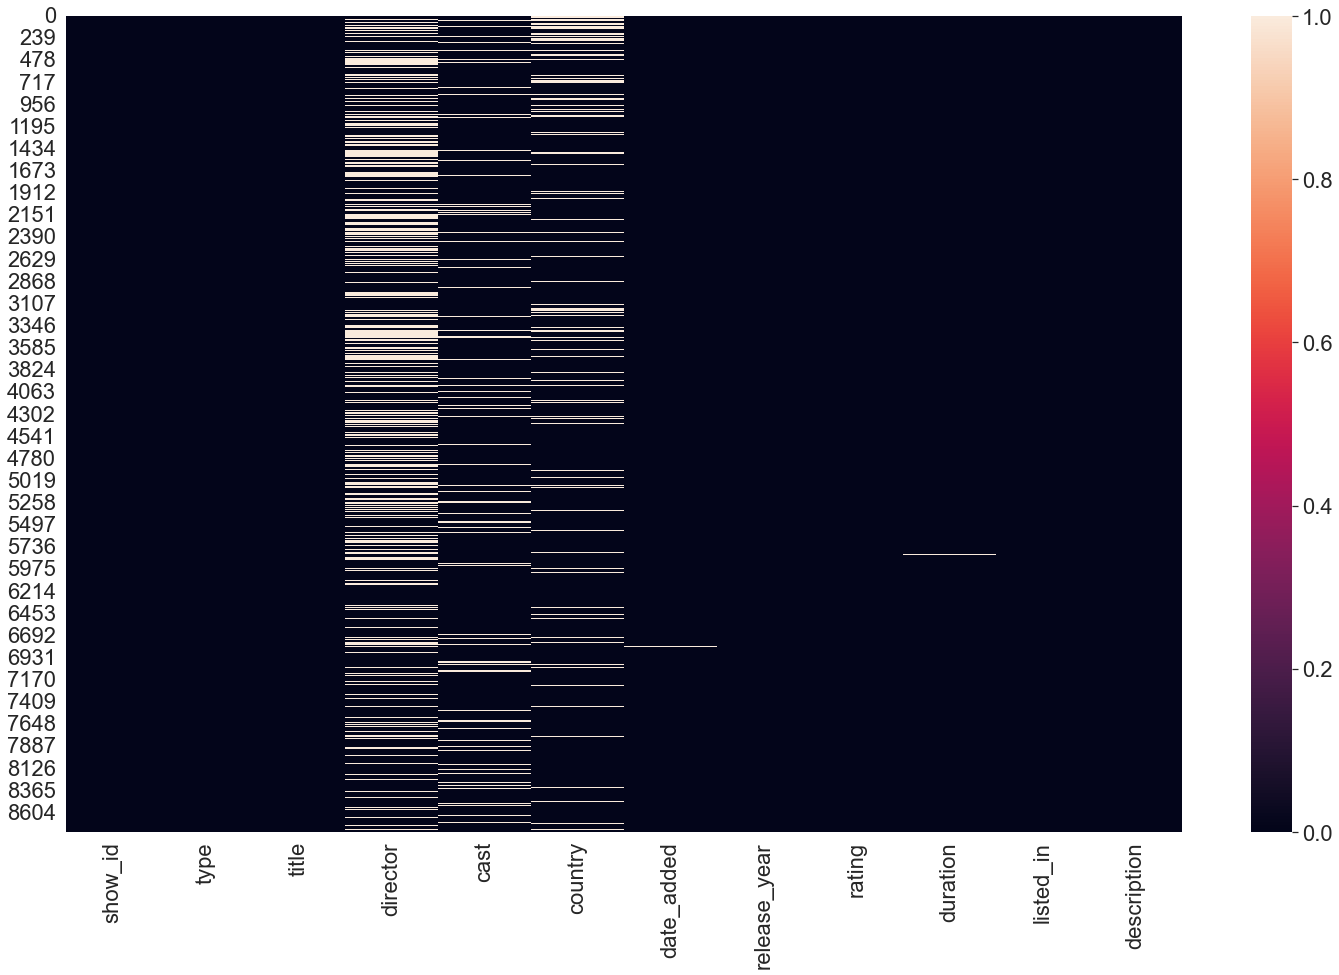

In [290]:
df.info()
sns.heatmap(df.isnull());

In [291]:
df.drop('show_id', axis=1, inplace=True)

In [292]:
# df=df.dropna(subset=['country'])
df['country'] = df['country'].fillna('n/a')

In [293]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [294]:
to_unique = ['type', 'rating', 'duration'] # just to have an idea of unique values in these columns
for i in to_unique:
    print(df[i].unique())

['Movie' 'TV Show']
['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']
['90 min' '2 Seasons' '1 Season' '91 min' '125 min' '9 Seasons' '104 min'
 '127 min' '4 Seasons' '67 min' '94 min' '5 Seasons' '161 min' '61 min'
 '166 min' '147 min' '103 min' '97 min' '106 min' '111 min' '3 Seasons'
 '110 min' '105 min' '96 min' '124 min' '116 min' '98 min' '23 min'
 '115 min' '122 min' '99 min' '88 min' '100 min' '6 Seasons' '102 min'
 '93 min' '95 min' '85 min' '83 min' '113 min' '13 min' '182 min' '48 min'
 '145 min' '87 min' '92 min' '80 min' '117 min' '128 min' '119 min'
 '143 min' '114 min' '118 min' '108 min' '63 min' '121 min' '142 min'
 '154 min' '120 min' '82 min' '109 min' '101 min' '86 min' '229 min'
 '76 min' '89 min' '156 min' '112 min' '107 min' '129 min' '135 min'
 '136 min' '165 min' '150 min' '133 min' '70 min' '84 min' '140 min'
 '78 min' '7 Seasons' '64 min' '59 min' '139 min' '69 min' '148 min'
 '18

### Clean the duration column <a name='duration__cleaning'></a>

In [295]:
import re
def clean_duration(x):
    pattern = r'\d+'
    try:
        if 'min' in x:
            x = x.strip()
            time = re.search(pattern, x).group()
            if int(time)<30:
                x=x.replace(time, '≈30')
            elif int(time)<=60:
                x=x.replace(time, '≈60')
            else:
                hrs = int(time) // 60
                x= f'≈{hrs} hrs'
        return x
    except TypeError:
        pass
            
df['duration'] = df['duration'].apply(clean_duration)
df['duration']

0          ≈1 hrs
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802       ≈2 hrs
8803    2 Seasons
8804       ≈1 hrs
8805       ≈1 hrs
8806       ≈1 hrs
Name: duration, Length: 8807, dtype: object

In [296]:
df[df['type']=='TV Show']['duration'].unique()

array(['2 Seasons', '1 Season', '9 Seasons', '4 Seasons', '5 Seasons',
       '3 Seasons', '6 Seasons', '7 Seasons', '10 Seasons', '8 Seasons',
       '17 Seasons', '13 Seasons', '15 Seasons', '12 Seasons',
       '11 Seasons'], dtype=object)

## Country Cleanup <a name='country_cleanup'></a>

In [298]:
def get_available_countries():
    all_countries_available = []
    non_filtered_countries = df['country'].str.split(',')
    for i in non_filtered_countries:
        try:
            for j in i:
                j = j.strip()
                if j not in all_countries_available:
                    all_countries_available.append(j)
        except TypeError:
            pass
    return all_countries_available
countries = get_available_countries()
# countries

def decompose_dataset():
    temp_df = df.copy()
    temp_df.drop(temp_df.index, inplace=True)
    non_filtered_countries = df['country'].str.split(',')
    print(temp_df.shape)
    try:
        for idx,lst in enumerate(non_filtered_countries):
            for country in lst:
                if country == ' ':
                    continue
                country = country.strip()
                row = df.iloc[idx,:].copy()
                row['country'] = country
                temp_df = temp_df.append(row)

    except TypeError:
        pass

    return temp_df
df_decomposed = decompose_dataset()
df_decomposed.head(10)

(0, 11)


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,≈1 hrs,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",n/a,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,n/a,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",n/a,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",n/a,"September 24, 2021",2021,PG,≈1 hrs,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,"September 24, 2021",1993,TV-MA,≈2 hrs,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ghana,"September 24, 2021",1993,TV-MA,≈2 hrs,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Burkina Faso,"September 24, 2021",1993,TV-MA,≈2 hrs,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


# Exploratory data analysis <a name='eda'></a>

## Country Analysis <a name='country__analysis'></a>

#### Top-20 countries by show production? <a name='q__top20_countries'></a>

In [299]:
values = df_decomposed['country'].value_counts()[:20]

values = values.to_frame().reset_index()
values = values.rename(columns={
    'index':'country',
    'country': 'count'
})
fig = px.histogram(data_frame=values, x='country', y='count',
                   title='Top 20 countries counts')
fig.update_xaxes(title_text='Countries',
                tickangle=45,
                title_standoff=20)
fig.update_yaxes(title_text='Count')
# fig.update_layout(hovermode='x')

*Conclusion*:
We can see the US as the leading country in movie production. There are India and UK following but even with them combined - it's **not** reaching the level of the US.

#### What type quantity of shows do top-3 countries produce? <a name='q__type_quantity'></a>

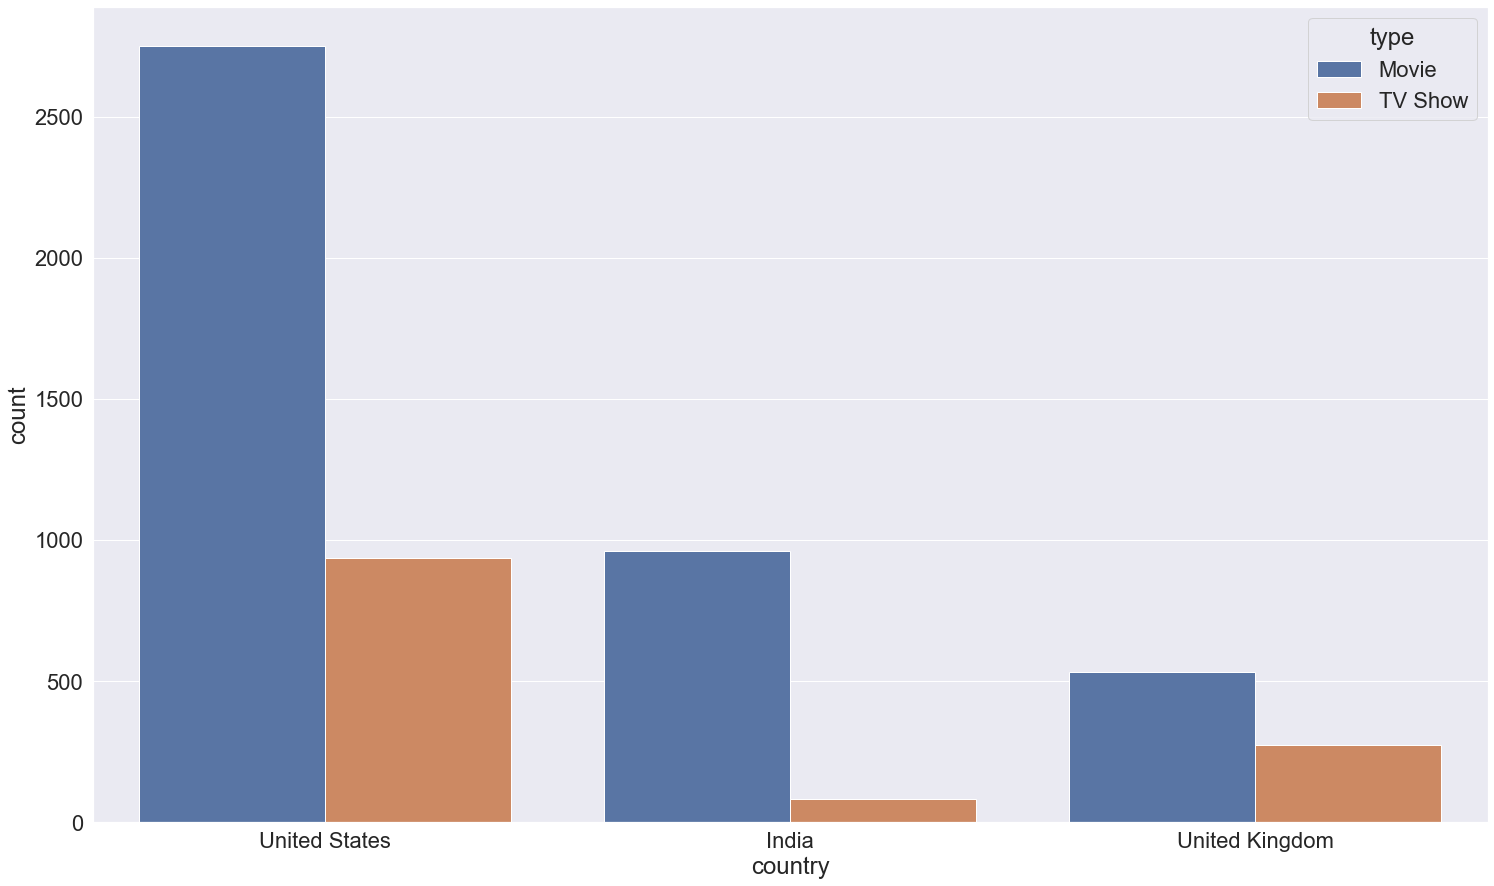

In [300]:
top_countries = ('United States', 'India', 'United Kingdom')
data = df_decomposed[df_decomposed['country'].isin(top_countries)]
sns.countplot(data=data, x='country', hue='type');

*Conclusion*: Top-3 countries preffer to produce movies than TV-Series. 

In [301]:
df_decomposed.shape

(10850, 11)

In [302]:
df_decomposed = df_decomposed.reset_index(drop=True)
# df_decomposed.groupby(by='title').head()
df_decomposed.head(15)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,≈1 hrs,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",n/a,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,n/a,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",n/a,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",n/a,"September 24, 2021",2021,PG,≈1 hrs,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,"September 24, 2021",1993,TV-MA,≈2 hrs,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ghana,"September 24, 2021",1993,TV-MA,≈2 hrs,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Burkina Faso,"September 24, 2021",1993,TV-MA,≈2 hrs,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


In [303]:
df_decomposed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10850 entries, 0 to 10849
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          10850 non-null  object
 1   title         10850 non-null  object
 2   director      7880 non-null   object
 3   cast          9844 non-null   object
 4   country       10850 non-null  object
 5   date_added    10840 non-null  object
 6   release_year  10850 non-null  int64 
 7   rating        10846 non-null  object
 8   duration      10847 non-null  object
 9   listed_in     10850 non-null  object
 10  description   10850 non-null  object
dtypes: int64(1), object(10)
memory usage: 932.5+ KB


In [304]:
# filtered_countries = df_decomposed['country'].value_counts()
# filtered_countries = filtered_countries[filtered_countries>30].to_frame()
# filtered_countries=filtered_countries.drop('n/a', axis=0)

In [305]:
# sns.countplot(data=df_decomposed, x='country')
# plt.show()

# fig = px.histogram(data_frame=filtered_countries, x=filtered_countries.index, y=filtered_countries.country)
# fig.show()

## Show type analysis <a name='type__analysis'></a>

#### Of what type are there more shows? <a name='q__more_type'></a>

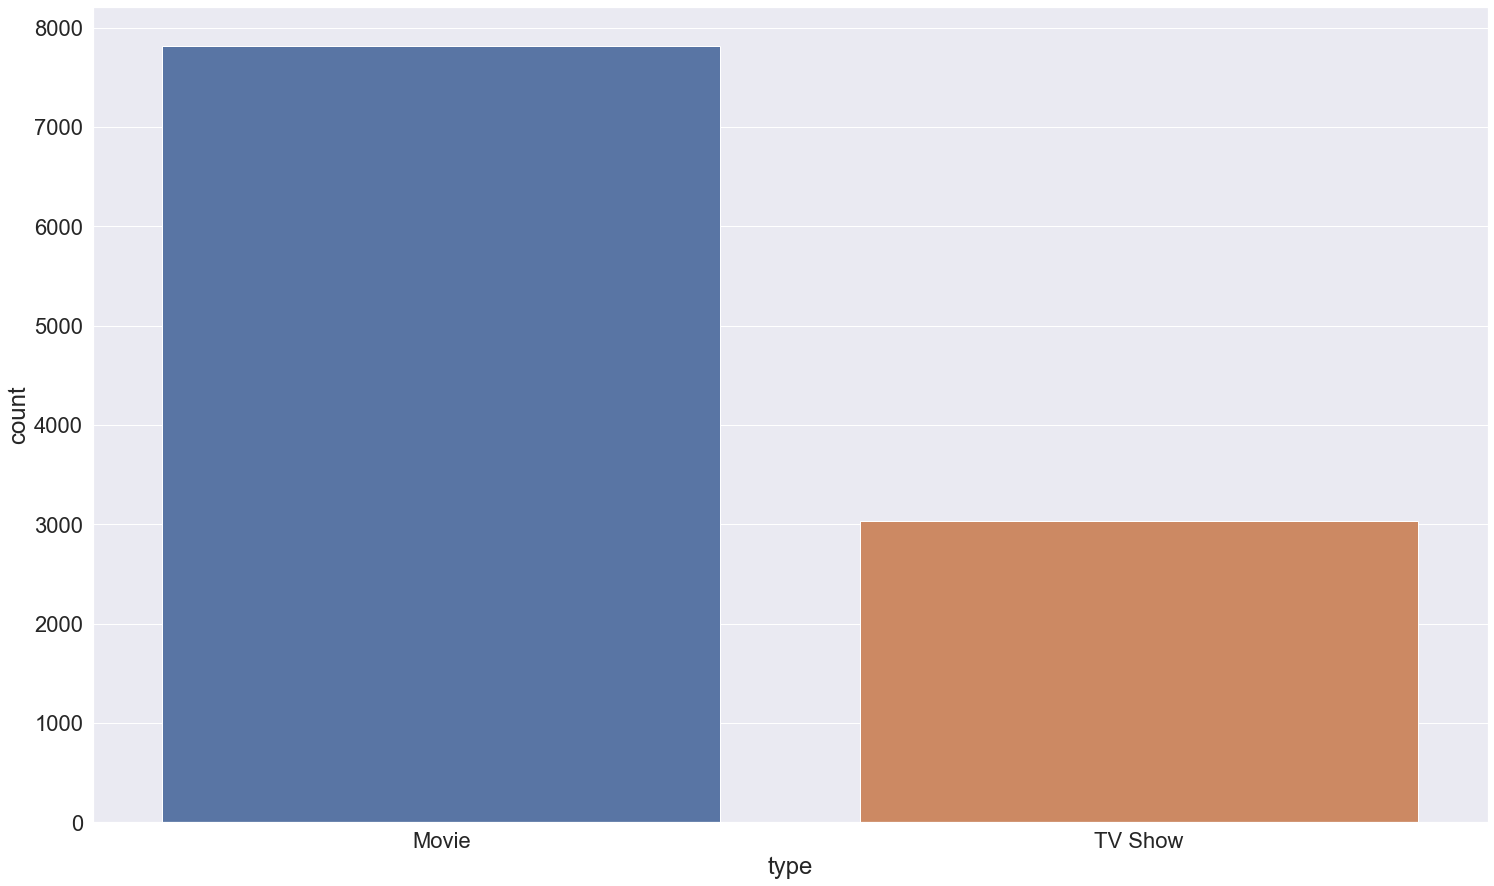

In [306]:
sns.countplot(data=df_decomposed, x='type')
plt.show()

*Conclusion*: As we saw with the top-3 countries production type - here it's the same. Most countries produce movies to TV-Shows.

#### What are the ratings of shows? Top-3 ratings for movies/TV-Series? <a name='q__ratings'></a>

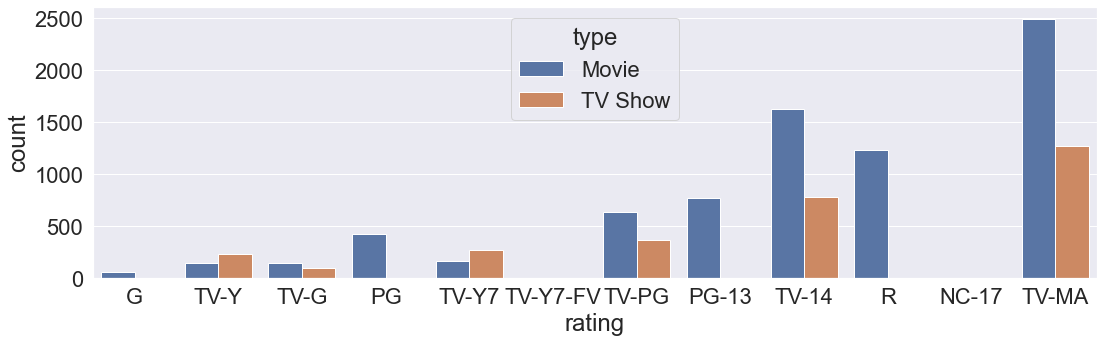

In [307]:
plt.rcParams['figure.figsize']=(18,5) # change size of all figures

rating_order = ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA'] # worst to best
g = sns.countplot(data=df_decomposed, x='rating', order=rating_order, hue='type')
plt.show()

*Conclusion*: top-3 ratings for movies - TV-MA, TV-14, R. Top-3 ratings for TV-Series -TV-MA, TV-14, TV-PG  

In [308]:
df_movies = df_decomposed[df_decomposed['type']=='Movie'].reset_index(drop=True)
df_shows = df_decomposed[df_decomposed['type']=='TV Show'].reset_index(drop=True)

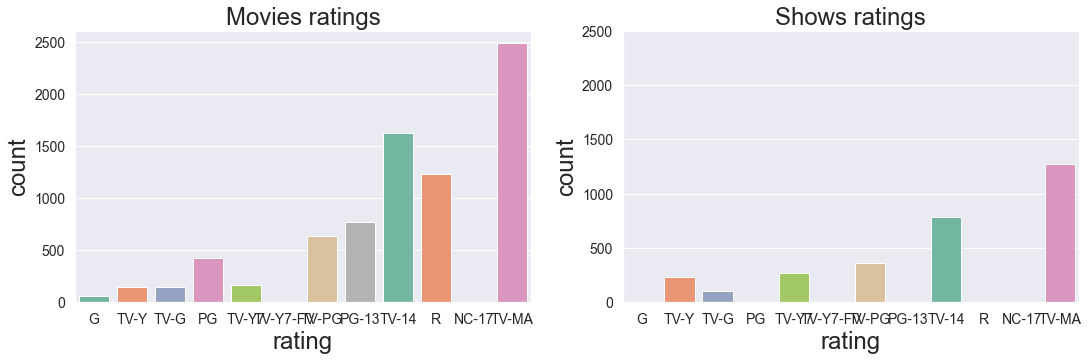

In [309]:
fig, ax = plt.subplots(1,2)
palette = 'Set2'


g = sns.countplot(data=df_movies, x='rating', order=rating_order, ax=ax[0], palette=palette)
g2 = sns.countplot(data=df_shows, x='rating', order=rating_order, ax=ax[1], palette=palette)
g2.set(yticks=np.arange(0,3000,500))
g.set_title('Movies ratings')
g2.set_title('Shows ratings')
g.tick_params(labelsize=14)
g2.tick_params(labelsize=14)

plt.show()

## Rating analysis <a name='rating__analysis'></a>

In [310]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [311]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [312]:
# dropped outliers
df.drop(df[df['rating']=='74 min'].index, axis=0, inplace=True)
df.drop(df[df['rating']=='84 min'].index, axis=0, inplace=True)
df.drop(df[df['rating']=='66 min'].index, axis=0, inplace=True)

In [313]:
df[df['rating']=='74 min'].index

Int64Index([], dtype='int64')

In [314]:
df_movies.rating.value_counts()

TV-MA       2485
TV-14       1623
R           1234
PG-13        769
TV-PG        637
PG           429
TV-Y7        162
TV-Y         148
TV-G         144
NR           105
G             62
TV-Y7-FV       7
NC-17          5
UR             4
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

#### What is the distribution of ratings in movies/series? <a name='q__rating_dist'></a>

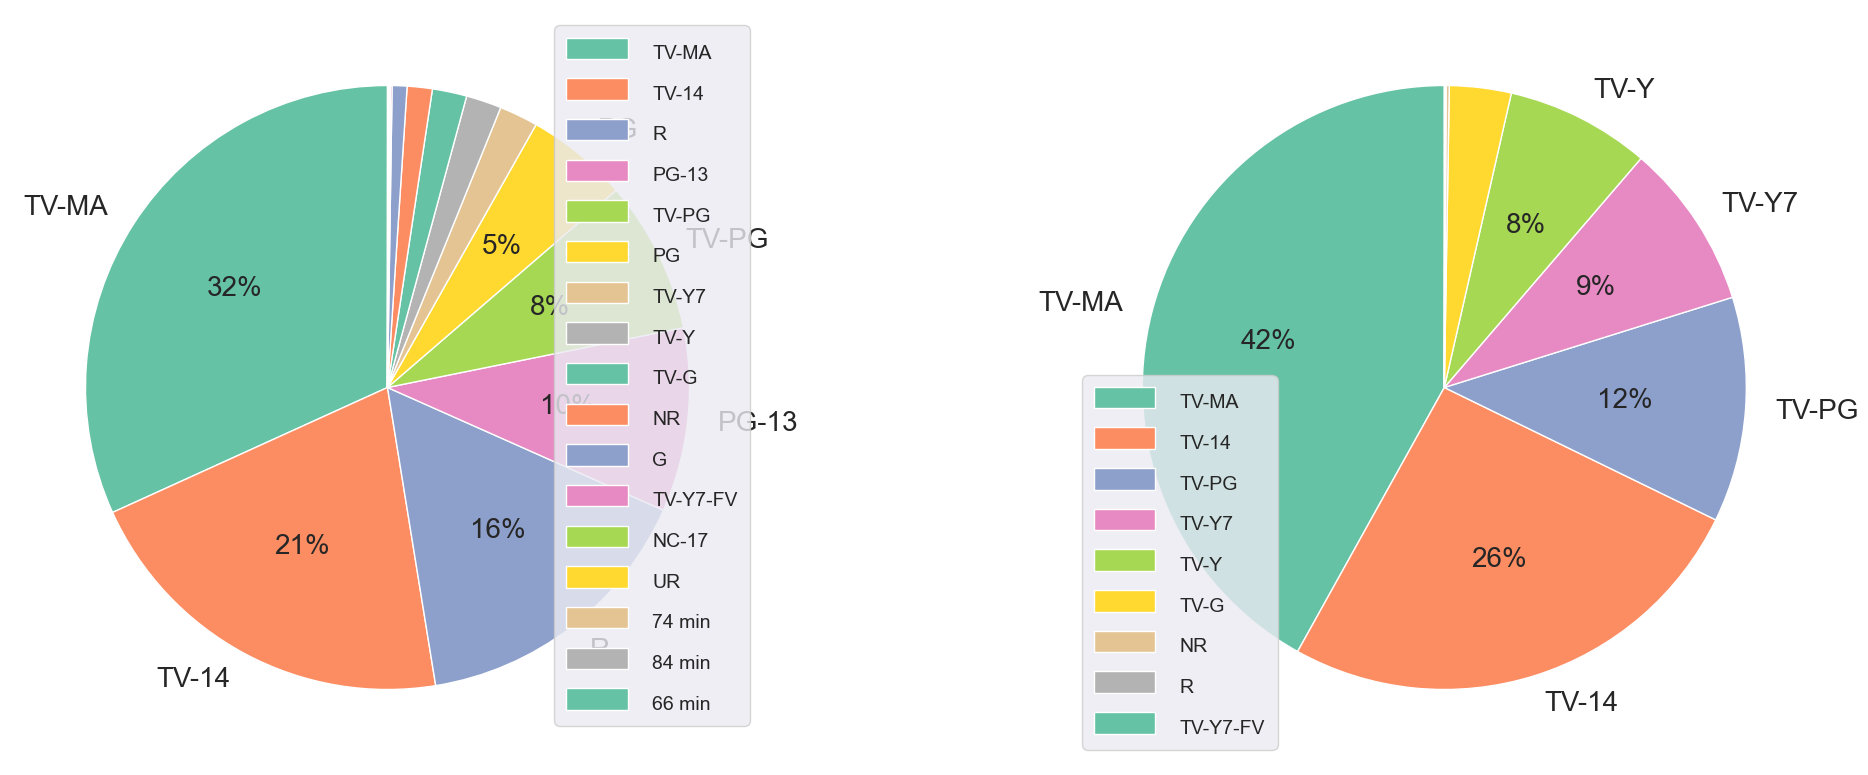

In [315]:
fig = plt.figure(figsize=(25,10), dpi=100)
# gs = gridspec.GridSpec(1,2, width_ratios=[3, 1])

LEGEND_FONT_SIZE = '14'
LABELS_FONT_SIZE = 20
color = sns.color_palette('Set2')
movies_ratings_counts = df_movies['rating'].value_counts()
series_ratings_counts = df_shows['rating'].value_counts()

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

def autopct_more_than_1(pct):
    return ('%1.f%%' % pct) if pct > 4 else ''

def get_new_labels(sizes, labels, legend=False):
    if not legend:
        new_labels = [label if size > 200 else '' for size, label in zip(sizes, labels)]
    else:
        return labels
    return new_labels

# Pie 1
ratings = df_movies['rating'].value_counts()
size, labels = ratings.values, ratings.index

ax1.pie(data=df_movies, x=movies_ratings_counts,labels=get_new_labels(size, labels, False), 
        startangle=90, colors=color, autopct=autopct_more_than_1, textprops={'fontsize':LABELS_FONT_SIZE})

ax1.legend(get_new_labels(size, labels, True),loc='upper right')
plt.setp(ax1.get_legend().get_texts(), fontsize=LEGEND_FONT_SIZE)


# Pie 2
ratings = df_shows['rating'].value_counts()
size, labels = ratings.values, ratings.index

ax2.pie(data=df_shows, x=series_ratings_counts, labels=get_new_labels(size, labels, False),
        startangle=90, colors=color, autopct=autopct_more_than_1, textprops={'fontsize':LABELS_FONT_SIZE})

ax2.legend(get_new_labels(size, labels, True),loc='lower left')
plt.setp(ax2.get_legend().get_texts(), fontsize=LEGEND_FONT_SIZE);

*Conclusion*: We see that both movies and TV-Series mostly have TV-MA and TV-14 ratings.

In [316]:
sns.color_palette('Set3')

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

## Director analysis <a name='director__analysis'></a>

#### Which director filmed most shows? <a name='q__top_director'></a>

In [317]:
directors = df.director.value_counts()
directors[directors>5]

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Martin Scorsese           12
Youssef Chahine           12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Ryan Polito                8
Hakan Algül                8
Quentin Tarantino          8
Kunle Afolayan             8
Johnnie To                 8
Lance Bangs                8
Yılmaz Erdoğan             8
Robert Rodriguez           8
Shannon Hartman            8
Fernando Ayllón            8
Troy Miller                8
Hidenori Inoue             7
S.S. Rajamouli             7
Toshiya Shinohara          7
Mae Czarina Cruz           7
Ozan Açıktan               7
Prakash Satam              7
Clint Eastwood             7
Justin G. Dyck             7
Ram Gopal Varma            7
McG                        7
Ron Howard                 7
Omoni Oboli   

*Conclusion*: Rajiv Chilaka is an Indian filmmaker who made 19 movies+TV-Shows that were added by Netflix.

In [318]:
df_decomposed[df_decomposed['director']=='Rajiv Chilaka']['director'].value_counts()

Rajiv Chilaka    19
Name: director, dtype: int64

In [319]:
df[df['director']=='Rajiv Chilaka']

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
406,Movie,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",n/a,"July 22, 2021",2013,TV-Y7,≈1 hrs,Children & Family Movies,Things get spooky when Bheem and his buddies t...
407,Movie,Chhota Bheem & Ganesh,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",n/a,"July 22, 2021",2009,TV-Y7,≈1 hrs,Children & Family Movies,Bheem and Lord Ganesha join forces to save Dho...
408,Movie,Chhota Bheem & Krishna: Mayanagari,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",n/a,"July 22, 2021",2011,TV-Y7,≈1 hrs,Children & Family Movies,Young lord Krishna has fallen for demoness Maa...
409,Movie,Chhota Bheem & Krishna: Pataliputra- City of t...,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",n/a,"July 22, 2021",2010,TV-Y7,≈1 hrs,Children & Family Movies,Krishna needs Bheem’s help: The ruined city of...
410,Movie,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"July 22, 2021",2013,TV-Y7,≈1 hrs,Children & Family Movies,When a stranger tries to steal an amulet from ...
411,Movie,Chhota Bheem And The Crown of Valhalla,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",n/a,"July 22, 2021",2013,TV-Y7,≈1 hrs,Children & Family Movies,To save the kingdom of Valhalla from invasion ...
412,Movie,Chhota Bheem and the Incan Adventure,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",n/a,"July 22, 2021",2013,TV-Y7,≈1 hrs,Children & Family Movies,"When Dholakpur’s princess is kidnapped, Bheem ..."
413,Movie,Chhota Bheem and The ShiNobi Secret,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",n/a,"July 22, 2021",2013,TV-Y7,≈1 hrs,Children & Family Movies,After learning of a samurai village under thre...
414,Movie,Chhota Bheem Aur Hanuman,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",n/a,"July 22, 2021",2012,TV-Y7,≈1 hrs,Children & Family Movies,When two evil entities kidnap a princess in a ...
415,Movie,Chhota Bheem aur Krishna,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"July 22, 2021",2009,TV-Y7,≈1 hrs,Children & Family Movies,"Centuries after the end of a conqueror's rule,..."


 ## Release-year analysis <a name='year__analysis'></a>

In [320]:
# In what year most movies/series were released?
def filter_year(x):
    try:
        pattern = r'\d{4}'
        year = re.search(pattern, x).group()
        return year
    except:
        pass

df['year_released'] = df['date_added'].apply(filter_year)

df.head()
# df['date_added'].value_counts().head(20)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_released
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,≈1 hrs,Documentaries,"As her father nears the end of his life, filmm...",2021
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",n/a,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,TV Show,Jailbirds New Orleans,NaN,NaN,n/a,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021


#### In what year most shows were added to Netflix? <a name='q__biggest_year'></a>

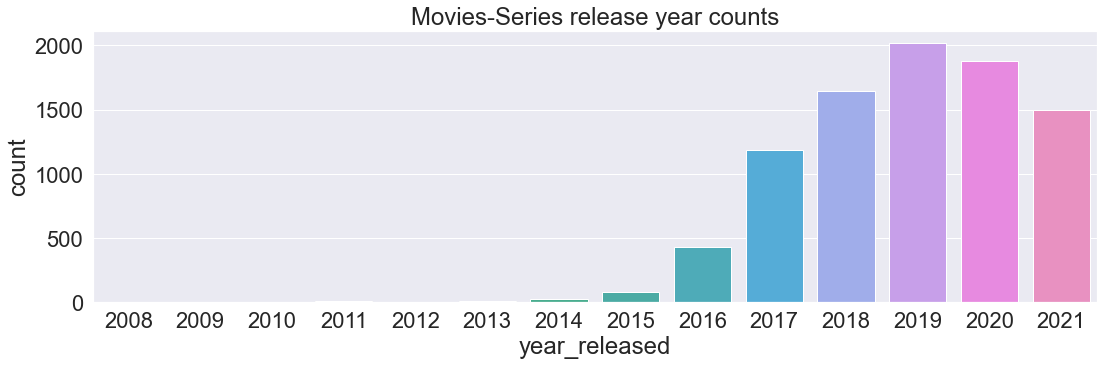

In [321]:

order = df['year_released'].sort_values(ascending=True).unique()[:-1]
# px.histogram(data_frame=df, x='year_released')

fig = sns.countplot(data=df, x='year_released', order=order)
fig.set_title('Movies-Series release year counts', loc='center');


*Conclusion*: in 2019 over 2000 TV-Shows were added to Netflix.

#### In what month were the most and least shows added in 2019? Is it a pattern for other years? <a name='q__best_worst_months'></a>

C:\Users\eniark\AppData\Local\Temp/ipykernel_8116/2260654234.py:23: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\eniark\AppData\Local\Temp/ipykernel_8116/2260654234.py:23: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\eniark\AppData\Local\Temp/ipykernel_8116/2260654234.py:23: UserWarning:

FixedFormatter should only be used together with FixedLocator



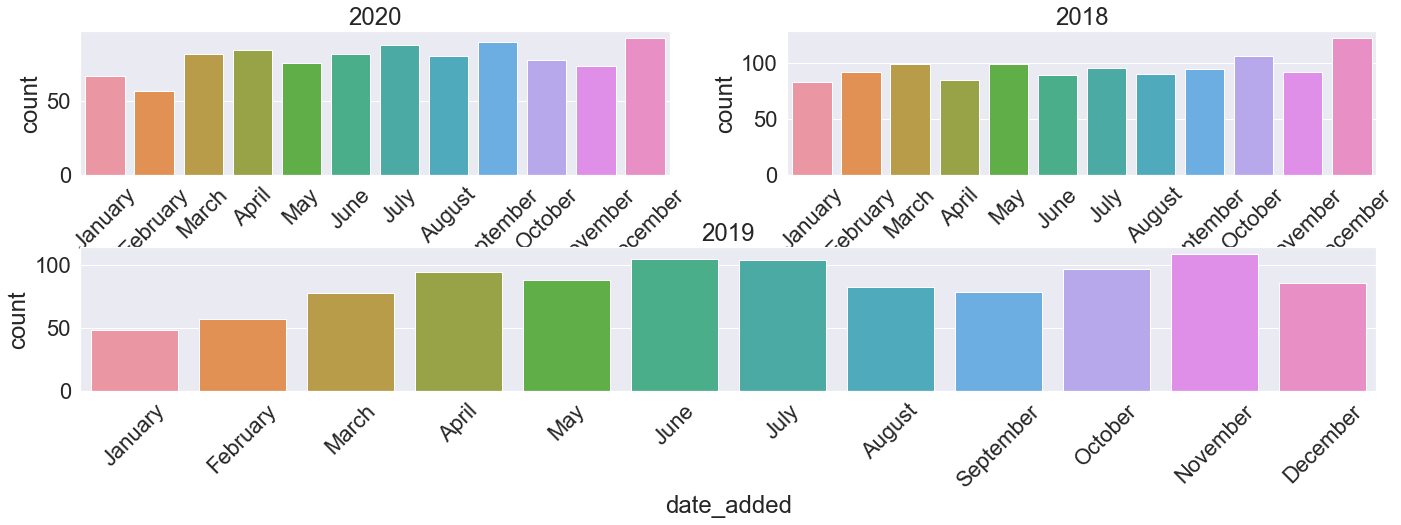

In [322]:
# in what month were the most and least shows added in 2019? Is it a pattern for other years?
def filter_months(x):
    pattern = r'\w+'
    try:
        month = re.search(pattern, x).group()
        return month
    except TypeError:
        pass
gs = gridspec.GridSpec(2, 4)
gs.update(wspace=0.5)
ax1 = plt.subplot(gs[0, :2], )
ax2 = plt.subplot(gs[0, 2:])
ax3 = plt.subplot(gs[1, 0:4])

plt.rcParams['figure.figsize']=(25,15)
plt.rc('font', size=17)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=.5)
order = ['January', 'February', 'March',
       'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i, ax in zip((2020, 2018,2019), (ax1,ax2,ax3)):
    months = df[df['release_year']==i]['date_added'].apply(filter_months)
    ax.set_xticklabels(labels=months.index,rotation=45)
    ax.set_title(i)
    sns.countplot(data=df, x=months, order=order, ax=ax)

*Conclusion*: in both 2020 and 2018 we se a peak in December. But in 2019, when most shows were added we don't observe that peak. Instead the peak is in November. So, it's **not** a pattern.

### Duration Analysis <a name='duration__analysis'></a>

#### What is the relationship between duration and show type? <a name='q__duration_show'></a>

GridSpec(1, 2)

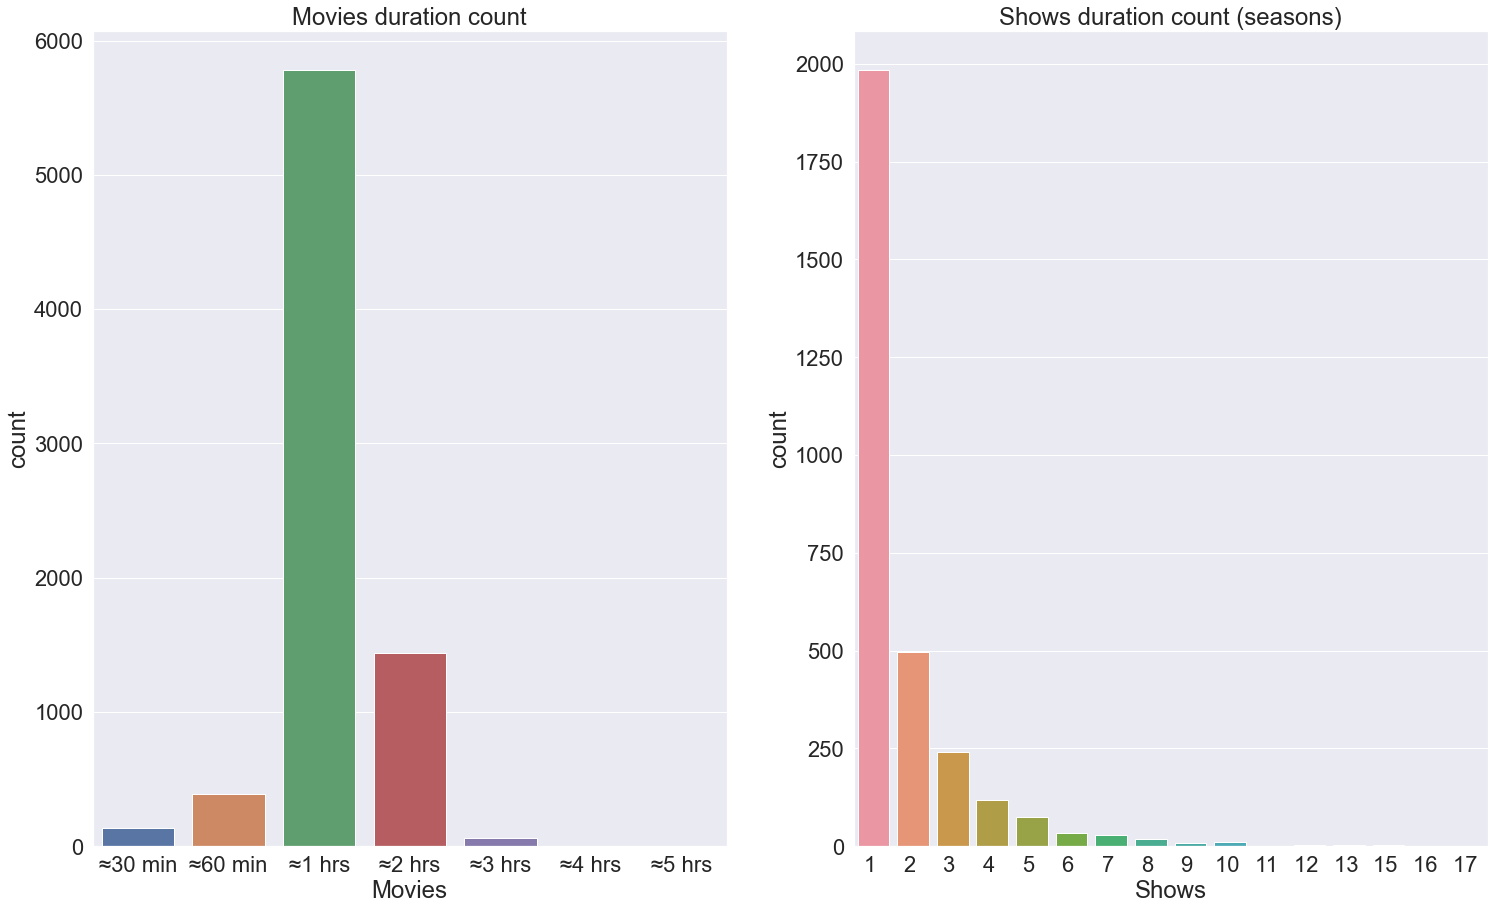

In [323]:

def filter_shows(x):
    pattern = r'\s*\w+\s*'
    hours = re.search(pattern, x).group() # found digit for some reason
    return hours
df_shows_filtered = df_shows['duration'].apply(filter_shows)


gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

order = ['≈30 min', '≈60 min', '≈1 hrs', '≈2 hrs',  '≈3 hrs',  '≈4 hrs',
       '≈5 hrs']
sns.countplot(data=df_movies, x='duration', ax=ax1, order=order)


order  = ['1 ', '2 ', '3 ','4 ','5 ','6 ','7 ','8 ','9 ',
          '10 ','11 ','12 ','13 ', '15 ','16 ','17 ']
sns.countplot(data=df_shows_filtered, x=df_shows_filtered.values, ax=ax2, order=order)

ax1.set_title('Movies duration count')
ax2.set_title('Shows duration count (seasons)');

ax1.set_xlabel('Movies')
ax2.set_xlabel('Shows')

gs

*Conclusion*: here, most of the movies have around 1 hour of duration. Most of the TV-Series are 1 season long.

In [324]:
df_shows.duration.unique()

array(['2 Seasons', '1 Season', '9 Seasons', '4 Seasons', '5 Seasons',
       '3 Seasons', '6 Seasons', '7 Seasons', '10 Seasons', '8 Seasons',
       '17 Seasons', '13 Seasons', '15 Seasons', '12 Seasons',
       '11 Seasons'], dtype=object)

### Cast analysis <a name='cast__analysis'></a>

#### Top-5 actors by occurence? <a name='q__top_actors'></a>

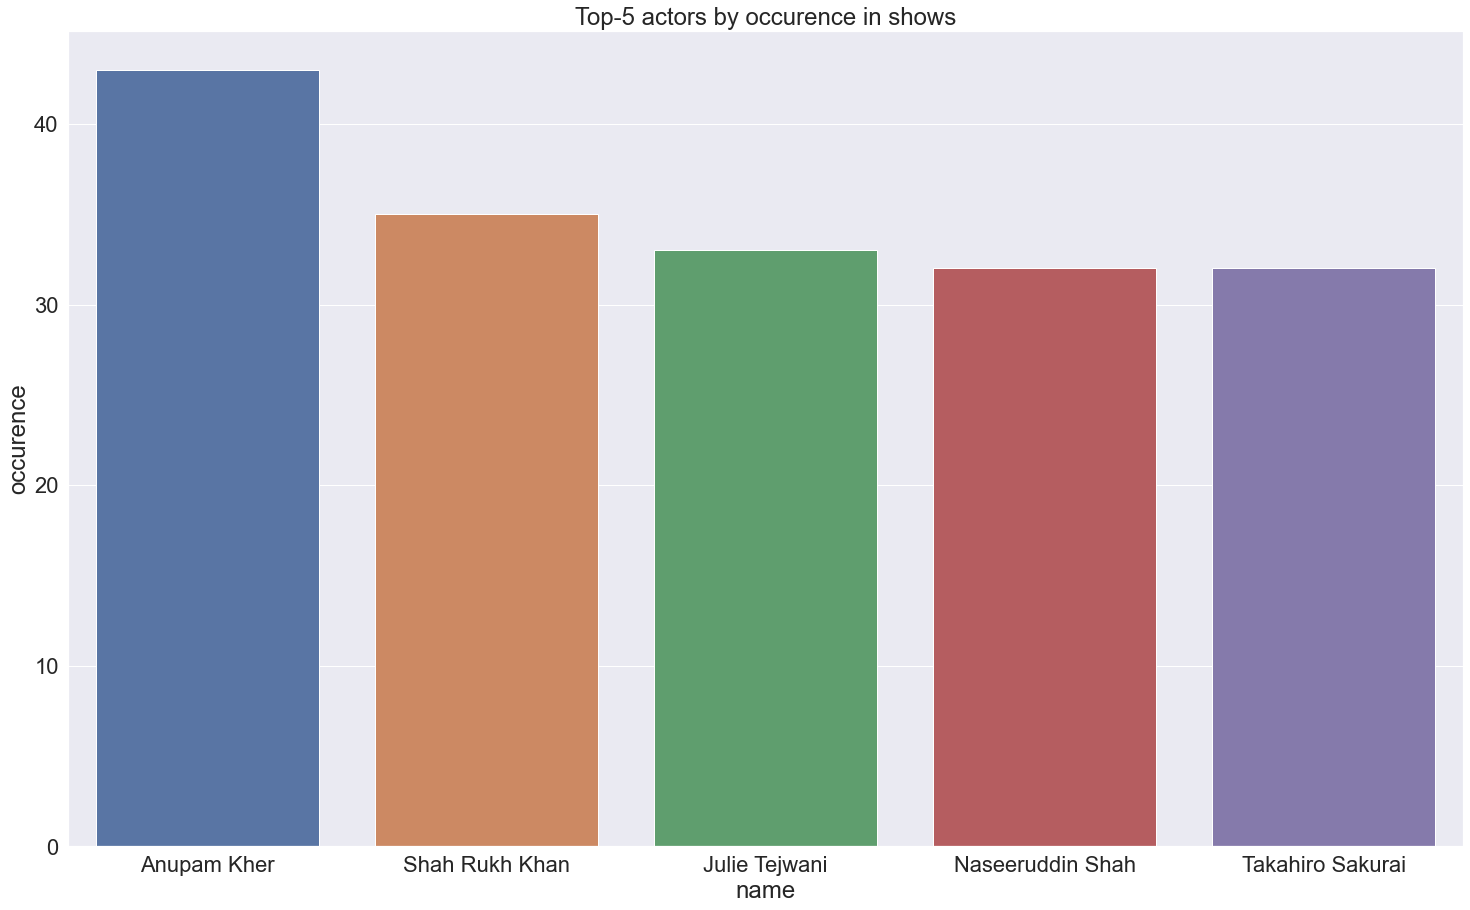

In [325]:
actors = {}

def get_actors(x):
    for i in x:
        if i in actors:
            actors[i] += 1
        else:
            actors[i]  = 1
def split_cast_column():
    lst = df['cast'].str.split(', ')
    lst = lst.dropna()
    lst.apply(get_actors)
split_cast_column()

actors = {k: v for k, v in sorted(actors.items(), key=lambda item: item[1], reverse=True)}
actors = pd.Series(actors)[:5].reset_index()
actors = actors.rename(columns={'index':'name', 0:'occurence'})

ax = sns.barplot(data=actors, x=actors.name, y=actors.occurence)
ax.set_title('Top-5 actors by occurence in shows');


*Conclusion*: Top-4 actors are **Indian**. Only Takahiro Sakurai is Japanese. Interesting.

# Summary <a name='conclusions'></a>

- **Top-20 countries by show production?** <br>
We can see the US as the leading country in movie production. There are India and UK following but even with them combined - it's **not** reaching the level of the US.


- **What type quantity of shows do top-3 countries produce?** <br>
Top-3 countries (US, India & the UK) preffer to produce movies than TV-Series. 


- **Of what type are there more shows?** <br>
As we saw with the top-3 countries production type - here it's the same. Most countries preffer to produce movies than TV-Shows.


- **What are the ratings of TV-Shows? Top-3 ratings for movies/TV-Series?** <br>
Top-3 ratings for movies - TV-MA, TV-14, R. Top-3 ratings for TV-Series -TV-MA, TV-14, TV-PG  


- **What is the distribution of ratings in movies/series?** <br>
We see that both movies and TV-Series mostly have TV-MA and TV-14 ratings.


- **Which director filmed most shows?** <br>
Rajiv Chilaka is an Indian filmmaker who made 19 movies+TV-Shows that were added by Netflix.


- **In what year most shows were added to Netflix?** <br>
In 2019 over 2000 TV-Shows were added to Netflix.


- **In what month were the most and least shows added in 2019? Is it a pattern for other years?** <br>
In both 2020 and 2018 we se a peak in December. But in 2019, when most shows were added we don't observe that peak. Instead the peak is in November. So, it's **not** a pattern.


- **What is the relationship between duration and show type?** <br>
Most of the movies have around 1 hour of duration. Most of the TV-Series are 1 season long.


- **Top-5 actors by occurence?** <br>
The Top-4 actors are **Indian**. Only Takahiro Sakurai is Japanese. Interesting.